<a href="https://colab.research.google.com/github/5harad/API201-students/blob/main/lectures/lecture-5-code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 5: Bayes' rule

In [1]:
library(tidyverse)

# set a simple black & white theme for our plots
theme_set(theme_bw())

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.0      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Part 1: Simulating cancer testing 

In [2]:
set.seed(1)

In [3]:
rbernoulli(5, 0.5)

[1] FALSE FALSE  TRUE  TRUE FALSE

In [4]:
rbernoulli(5, 0.5)

[1]  TRUE  TRUE  TRUE  TRUE FALSE

In [5]:
rbernoulli(5, c(0.75, 0.1, 0.1, .75, 0.1))

[1] FALSE FALSE FALSE  TRUE FALSE

In [6]:
rbernoulli(5, c(0.75, 0.1, 0.1, .75, 0.1))

[1]  TRUE FALSE  TRUE  TRUE FALSE

In [7]:
set.seed(22)

In [8]:
num_patients <- 1e6
incidence <- 0.009
tpr <- 0.75
tnr <- 0.9

In [9]:
cancer <- rbernoulli(num_patients, incidence)
head(cancer)

[1] FALSE FALSE  TRUE FALSE FALSE FALSE

In [10]:
p_pos <- if_else(cancer, tpr, 1-tnr)
head(p_pos)

[1] 0.10 0.10 0.75 0.10 0.10 0.10

In [11]:
set.seed(22)

In [12]:
patients <- tibble(
    cancer = rbernoulli(num_patients, incidence),
    test = rbernoulli(num_patients, if_else(cancer, tpr, 1-tnr))
)

In [13]:
head(patients)

cancer,test
<lgl>,<lgl>
FALSE,FALSE
FALSE,TRUE
TRUE,TRUE
FALSE,FALSE
FALSE,FALSE
FALSE,FALSE


In [14]:
patients %>%
    filter(test == TRUE) %>%
    summarize(p = mean(cancer))

p
<dbl>
0.06453958


# 2. Probabilities vs Counts

In [15]:
api201_mammograms <- read.csv(url("https://github.com/5harad/API201-students/blob/main/data/mammograms.csv?raw=true"))

In [16]:
survey_data <- api201_mammograms %>%
  mutate(count_prompt = count_prompt / 100) %>%
  pivot_longer(everything(), "condition") %>%
  filter(!is.na(value)) %>%
  mutate(condition = recode(condition, count_prompt = 'Counts', probability_prompt = 'Probabilities'))
  
  head(survey_data)

condition,value
<chr>,<dbl>
Counts,0.9300
Counts,0.0909
Probabilities,0.9300
Counts,0.0910
Probabilities,0.0900
Probabilities,0.0900


ERROR: ignored

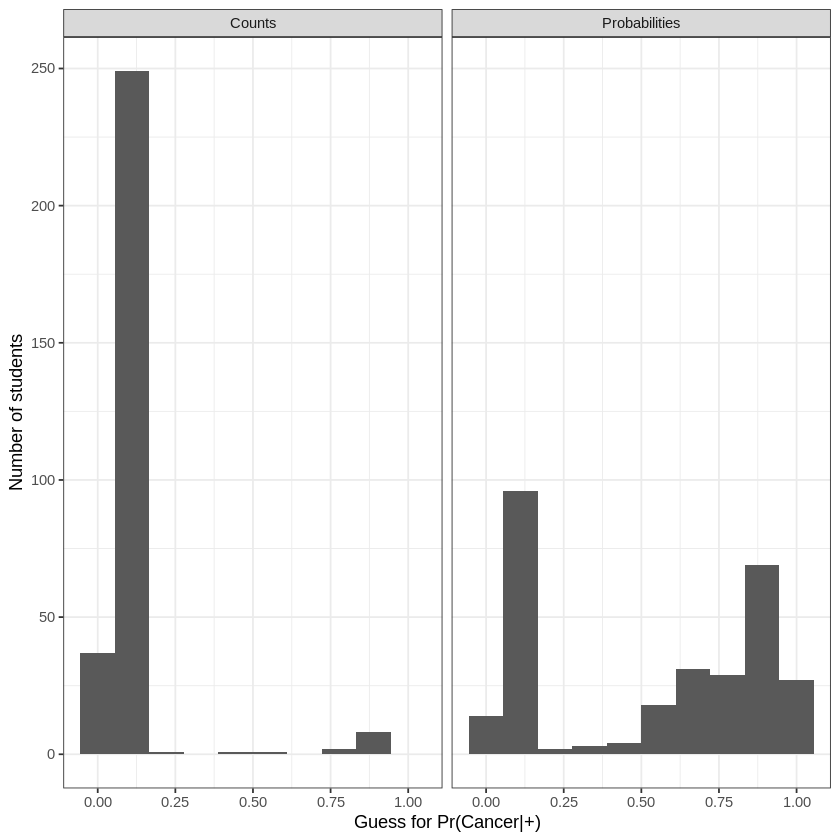

In [17]:
ggplot(survey_data, aes(value)) + 
  geom_histogram(bins=10) +
  facet_grid(~condition) +
  scale_x_continuous("Guess for Pr(Cancer|+)") + 
  scale_y_continuous("Number of students")

  ggsave('figs/counts_v_probabilities.pdf', width=6, height=4)